<a href="https://colab.research.google.com/github/LuissotoData/KIA-analisis/blob/main/Proyecto%20KIA-UANL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar las librerias necesarias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **importar los datos con pandas en un dataframe**




In [ ]:
df = pd.read_excel('B2Q Master_UANL.xlsx')
df.sample(5)

,DLR,TYPE,Unique_Test_ID,TESTER_SERIAL,Tester_Firmware_Version,Recommendation,State_of_Charge_Status,Inital_Battery_Voltage,State_of_Charge_Pct,Battery_Life_Pct,...,Cranking_Health_Pct,Cranking_Voltage,Vehicle_Model_Year,Vehicle_Model,DATE_CREATE,DATE_BATTERY_INSTALL,DATE_REGISTRATION,DATE_TEST,date_test_month,Type
2264,CA293,RETAIL,24395584,18040927,1.9,3,4,12.04,32,0,...,0,0.00,2019,FORTE,2021-01-04,2018-11-27,2021-01-04,2021-01-04,2021-01-01,Retail
131041,GLOVI,INSTOCK,25812309,18090480,2.0,6,1,12.77,100,90,...,67,8.83,2021,FORTE,2021-05-03,2021-05-03,2021-05-03,2021-05-03,2021-05-01,VPC
80881,GLOVI,INSTOCK,25623251,18090480,2.0,6,1,13.06,100,100,...,94,9.63,2021,RIO,2021-04-15,2021-04-15,2021-04-15,2021-04-15,2021-04-01,VPC
25091,MA054,RETAIL,25939585,20110318,2.0,8,1,12.57,94,42,...,79,8.64,2017,FORTE,2021-05-17,NaT,2021-05-15,2021-05-15,2021-05-01,Retail
94008,GLOVI,INSTOCK,26712695,18090430,2.0,6,1,12.89,100,100,...,98,9.72,2021,FORTE,2021-08-02,2021-08-02,2021-08-02,2021-08-02,2021-08-01,VPC


In [ ]:
#con esta linea podemos ver cuantos datos faltantes tiene el dataset y para poder saber que columnas podemos eliminar ya que los datosfaltantes pueden afectar el modelo 
df.isna().sum()

DLR                                    0
TYPE                                   0
Unique_Test_ID                         0
TESTER_SERIAL                          0
Tester_Firmware_Version                0
Recommendation                         0
State_of_Charge_Status                 0
Inital_Battery_Voltage                 0
State_of_Charge_Pct                    0
Battery_Life_Pct                       0
Measured_Battery_Value                 0
Battery_Life_Status                    0
Battery_Internal_Resistance            0
Test_Standard                          0
Battery_Crank_Reference_Value          0
Battery_Bar_Code_Value             82451
Battery_Type                           0
Battery_Nominal_Voltage                0
Battery_Brand                      46960
Battery_Model                      83316
Battery_Status                         0
Battery_Temperature                    0
Measured_Diode_Ripple_Frequency        0
Charging_Voltage                       0
Cranking_Health_

In [ ]:
#ya que la columna 'Recomendation es la columna a predecir esta seria la distribucion de los valores'
df['Recommendation'].value_counts()

6     132727
8       9233
7       5971
3       3552
1       2083
4        611
12       576
11        20
2         13
9          9
Name: Recommendation, dtype: int64

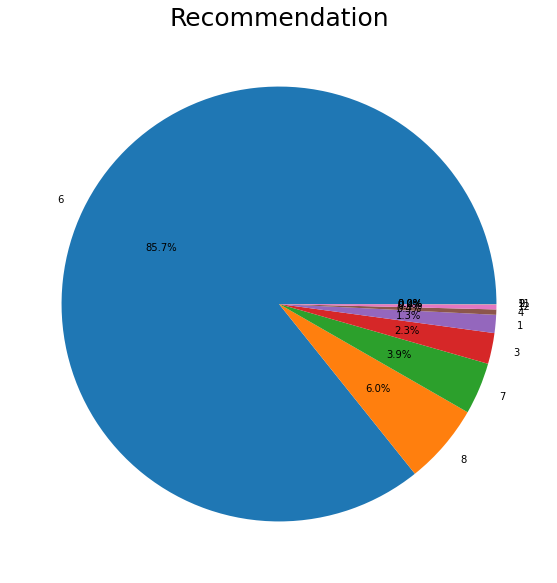

In [ ]:
sizes = list(df['Recommendation'].value_counts())
labels = [6,8,7,3,1,4,12,11,2,9]
plt.figure(figsize=(10,10))
plt.title('Recommendation', fontsize=25)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [ ]:
#se crea un nuevo dataset en el cual se eliminen las columnas 'Unique_Test_ID','Battery_Bar_Code_Value','DATE_BATTERY_INSTALL','DLR','Battery_Brand','Battery_Model' eliminando los datos faltantes 
df1 = df.drop(columns=['Unique_Test_ID','TESTER_SERIAL','Battery_Bar_Code_Value','DATE_BATTERY_INSTALL','DLR','Battery_Brand','Battery_Model'])
df1.sample(5)

,TYPE,Tester_Firmware_Version,Recommendation,State_of_Charge_Status,Inital_Battery_Voltage,State_of_Charge_Pct,Battery_Life_Pct,Measured_Battery_Value,Battery_Life_Status,Battery_Internal_Resistance,...,Cranking_Health_Status,Cranking_Health_Pct,Cranking_Voltage,Vehicle_Model_Year,Vehicle_Model,DATE_CREATE,DATE_REGISTRATION,DATE_TEST,date_test_month,Type
10904,RETAIL,2.0,8,1,12.40,84,22,438.22659,2,5.58,...,0,0,0.00,2017,FORTE,2021-04-20,2021-04-20,2021-04-20,2021-04-01,Retail
78773,INSTOCK,2.0,6,1,12.75,100,93,624.85274,1,3.65,...,1,82,8.96,2021,RIO,2021-07-26,2021-07-26,2021-07-26,2021-07-01,VPC
53824,INSTOCK,2.0,6,1,12.36,80,85,606.79247,1,4.15,...,0,0,0.00,2021,FORTE,2021-02-25,2021-02-25,2021-02-25,2021-02-01,Stock
141664,INSTOCK,2.0,6,1,12.91,100,71,576.17407,1,4.04,...,1,74,8.44,2021,FORTE,2021-02-05,2021-02-05,2021-02-05,2021-02-01,VPC
48403,INSTOCK,2.0,6,1,13.22,100,82,601.20570,1,3.95,...,0,0,0.00,2021,FORTE,2021-01-19,2021-01-19,2021-01-19,2021-01-01,Stock


In [ ]:
# ahora ya no tendriamos valores nulos en el dataset que podrian afectar a el modelo 
df1.isna().sum()

TYPE                               0
Tester_Firmware_Version            0
Recommendation                     0
State_of_Charge_Status             0
Inital_Battery_Voltage             0
State_of_Charge_Pct                0
Battery_Life_Pct                   0
Measured_Battery_Value             0
Battery_Life_Status                0
Battery_Internal_Resistance        0
Test_Standard                      0
Battery_Crank_Reference_Value      0
Battery_Type                       0
Battery_Nominal_Voltage            0
Battery_Status                     0
Battery_Temperature                0
Measured_Diode_Ripple_Frequency    0
Charging_Voltage                   0
Cranking_Health_Status             0
Cranking_Health_Pct                0
Cranking_Voltage                   0
Vehicle_Model_Year                 0
Vehicle_Model                      0
DATE_CREATE                        0
DATE_REGISTRATION                  0
DATE_TEST                          0
date_test_month                    0
T

In [ ]:
df1.dtypes

TYPE                                       object
Tester_Firmware_Version                   float64
Recommendation                              int64
State_of_Charge_Status                      int64
Inital_Battery_Voltage                    float64
State_of_Charge_Pct                         int64
Battery_Life_Pct                            int64
Measured_Battery_Value                    float64
Battery_Life_Status                         int64
Battery_Internal_Resistance               float64
Test_Standard                               int64
Battery_Crank_Reference_Value               int64
Battery_Type                                int64
Battery_Nominal_Voltage                     int64
Battery_Status                              int64
Battery_Temperature                         int64
Measured_Diode_Ripple_Frequency             int64
Charging_Voltage                          float64
Cranking_Health_Status                      int64
Cranking_Health_Pct                         int64


In [ ]:
#cambiar el tipo de datos a el tipo correcto
dic_replace_recom = {0:'Unknown', 
                     1:'Charge and continue to use', 
                     2:'Charge and replace soon', 
                     3:'Charge and retest', 
                     4:'Check Battery Size, Replace now', 
                     5:'Check Starter Motor, Check Battery Size, Replace now', 
                     6:'Continue to use', 
                     7:'Replace now', 
                     8:'Replace soon', 
                     9:'Enter Battery Rating', 
                     10:'Charge and Enter Battery Rating', 
                     11:'Check Starter Motor, Check Battery Size, Replace soon', 
                     12:'Check Starter Motor, Check Battery Size, Continue to use'}
                     
dic_bat = {0:'WET', 1:'MF', 2:'AGM Spiral', 3:'AGM Flat', 4:'GEL', 5:"EFB"}

df1['Recommendation'].replace(dic_replace_recom, inplace=True)
df1['Battery_Type'].replace(dic_bat, inplace=True)

#cambiamos las variables que eran categoricas
list_category = ['TYPE', 
                 'Tester_Firmware_Version',
                 'Recommendation',
                 'State_of_Charge_Status',
                 'Battery_Life_Status',
                 'Test_Standard',
                 'Battery_Type',
                 'Battery_Status',
                 'Cranking_Health_Status',
                 'Vehicle_Model_Year',
                 'Vehicle_Model']

for cols in list_category:
  df1[cols] = df1[cols].astype('category')

In [ ]:
#creamos las variables dummies para los valores de la columna recommendation

recom_dumie = pd.get_dummies(df1['Recommendation'])
df1 = pd.concat([df1, recom_dumie], axis = 1 )

In [ ]:
df1['Recommendation'].value_counts()

Continue to use                                             132727
Replace soon                                                  9233
Replace now                                                   5971
Charge and retest                                             3552
Charge and continue to use                                    2083
Check Battery Size, Replace now                                611
Check Starter Motor, Check Battery Size, Continue to use       576
Check Starter Motor, Check Battery Size, Replace soon           20
Charge and replace soon                                         13
Enter Battery Rating                                             9
Name: Recommendation, dtype: int64

In [ ]:
df1.head()

,TYPE,Tester_Firmware_Version,Recommendation,State_of_Charge_Status,Inital_Battery_Voltage,State_of_Charge_Pct,Battery_Life_Pct,Measured_Battery_Value,Battery_Life_Status,Battery_Internal_Resistance,...,Charge and continue to use,Charge and replace soon,Charge and retest,"Check Battery Size, Replace now","Check Starter Motor, Check Battery Size, Continue to use","Check Starter Motor, Check Battery Size, Replace soon",Continue to use,Enter Battery Rating,Replace now,Replace soon
0,RETAIL,2.0,Continue to use,1,13.04,100,100,782.20109,1,3.68,...,0,0,0,0,0,0,1,0,0,0
1,RETAIL,2.0,Continue to use,1,12.39,84,51,532.27550,1,4.64,...,0,0,0,0,0,0,1,0,0,0
2,RETAIL,2.0,Continue to use,1,12.92,100,58,547.55137,1,4.38,...,0,0,0,0,0,0,1,0,0,0
3,RETAIL,2.0,Charge and retest,4,3.82,0,0,32.18546,0,127.77,...,0,0,1,0,0,0,0,0,0,0
4,RETAIL,2.0,Charge and retest,4,2.22,0,0,33.38694,0,127.82,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df1.dtypes

TYPE                                                              category
Tester_Firmware_Version                                           category
Recommendation                                                    category
State_of_Charge_Status                                            category
Inital_Battery_Voltage                                             float64
State_of_Charge_Pct                                                  int64
Battery_Life_Pct                                                     int64
Measured_Battery_Value                                             float64
Battery_Life_Status                                               category
Battery_Internal_Resistance                                        float64
Test_Standard                                                     category
Battery_Crank_Reference_Value                                        int64
Battery_Type                                                      category
Battery_Nominal_Voltage  

# Analisis de los datos para encontrar relaciones 

In [ ]:
# la lista de estas columnas serian los que se analizarian para ver alguna correlacion 

features =['Inital_Battery_Voltage',
             'State_of_Charge_Pct',
             'Battery_Life_Pct',
             'Measured_Battery_Value',
             'Battery_Internal_Resistance',
             'Battery_Crank_Reference_Value',
             'Battery_Temperature',
             'Battery_Life_Status',
             'Recommendation',
             'Continue to use',
             'Replace soon',
             'Replace now',
             'Charge and retest']

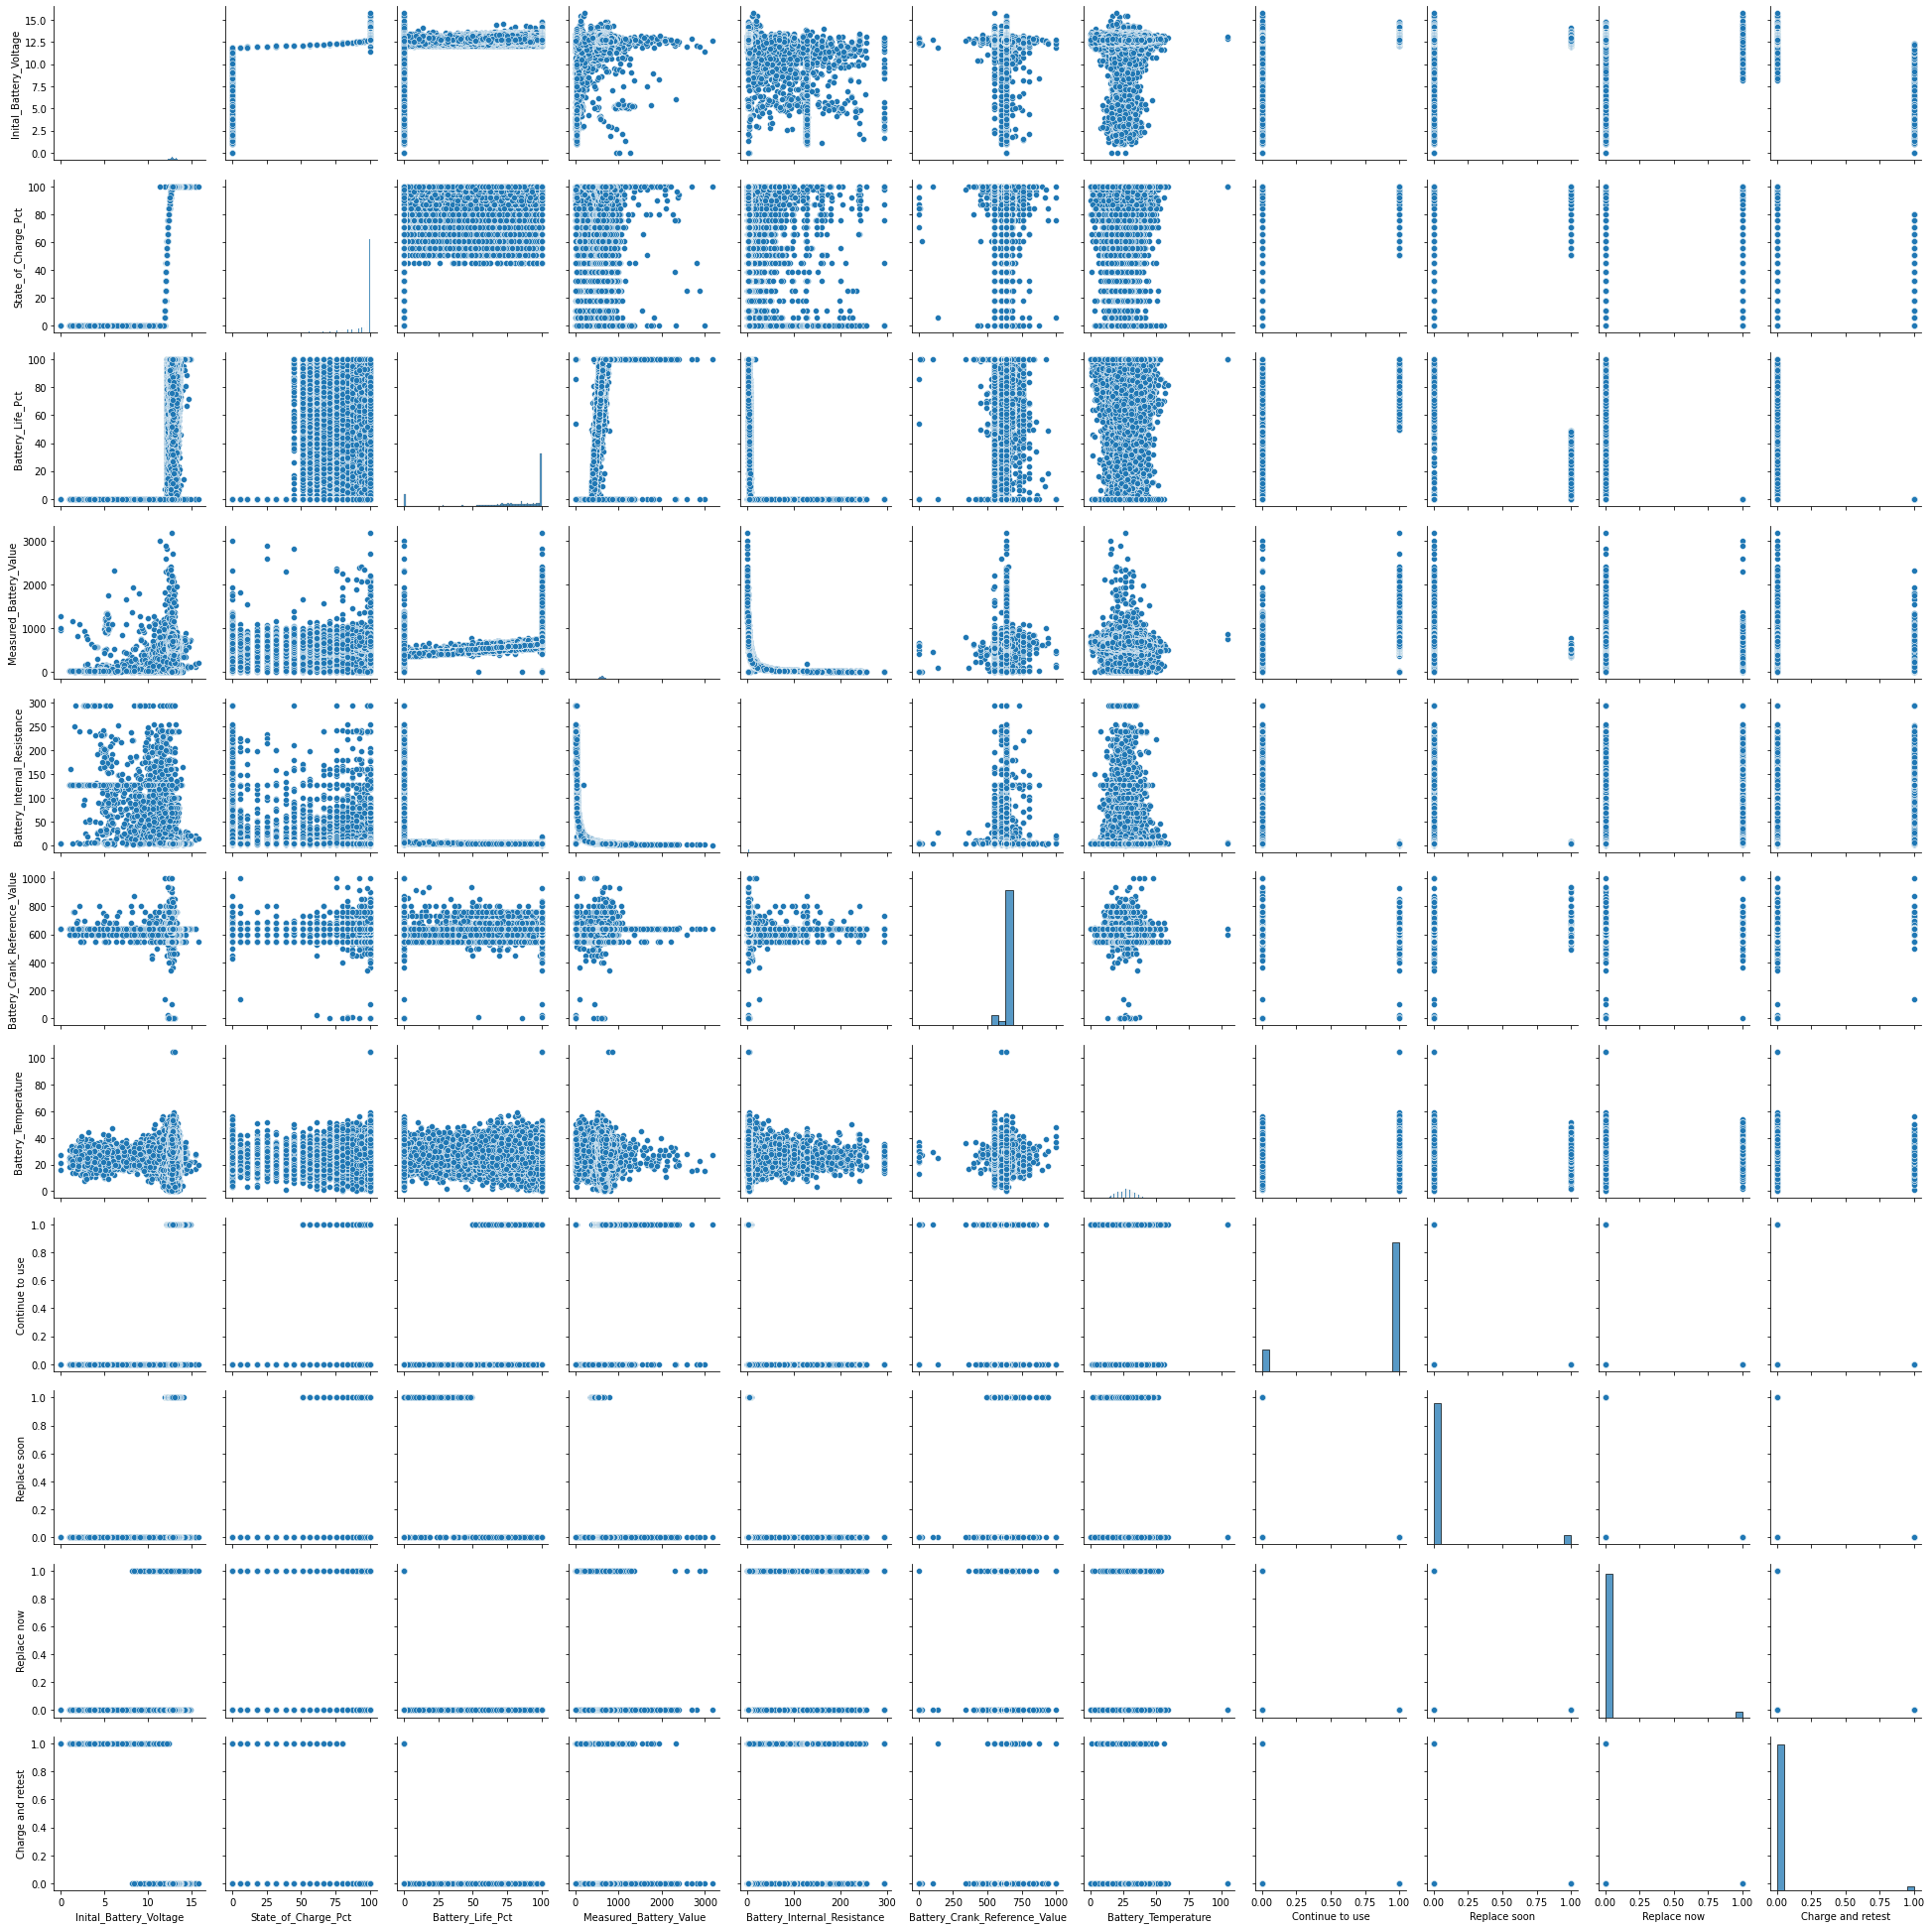

In [ ]:
sns.pairplot(df1[features])

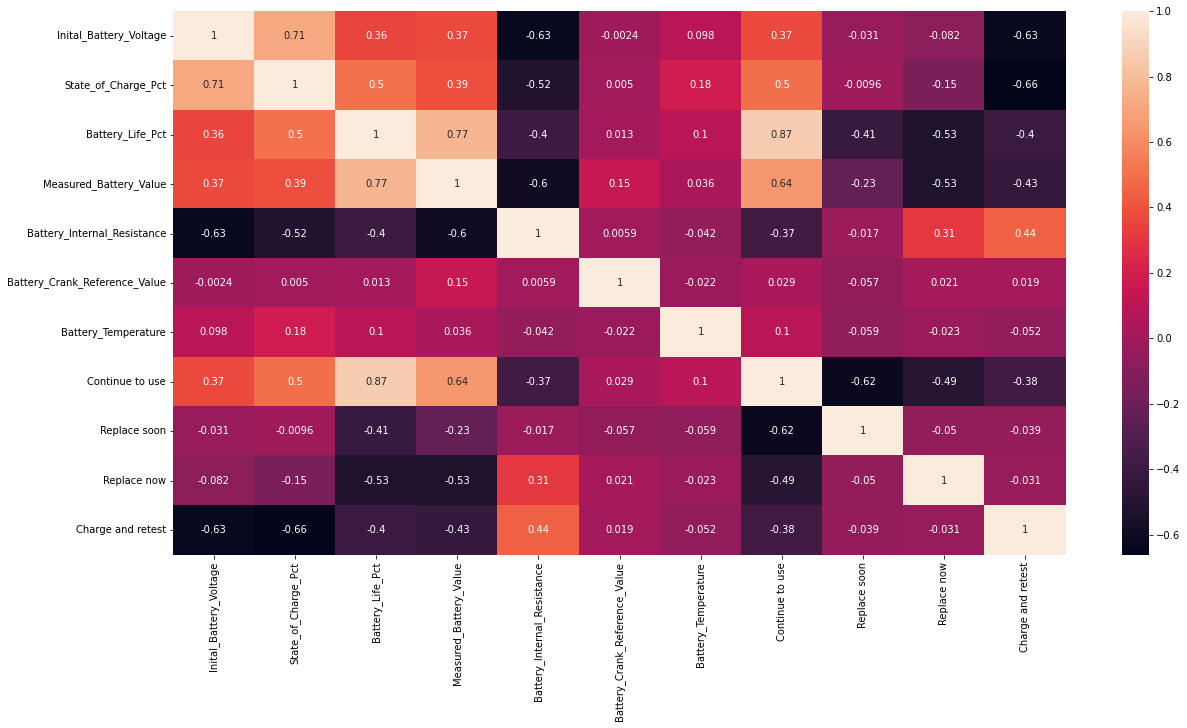

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1[features].corr(), cbar=True, annot=True)

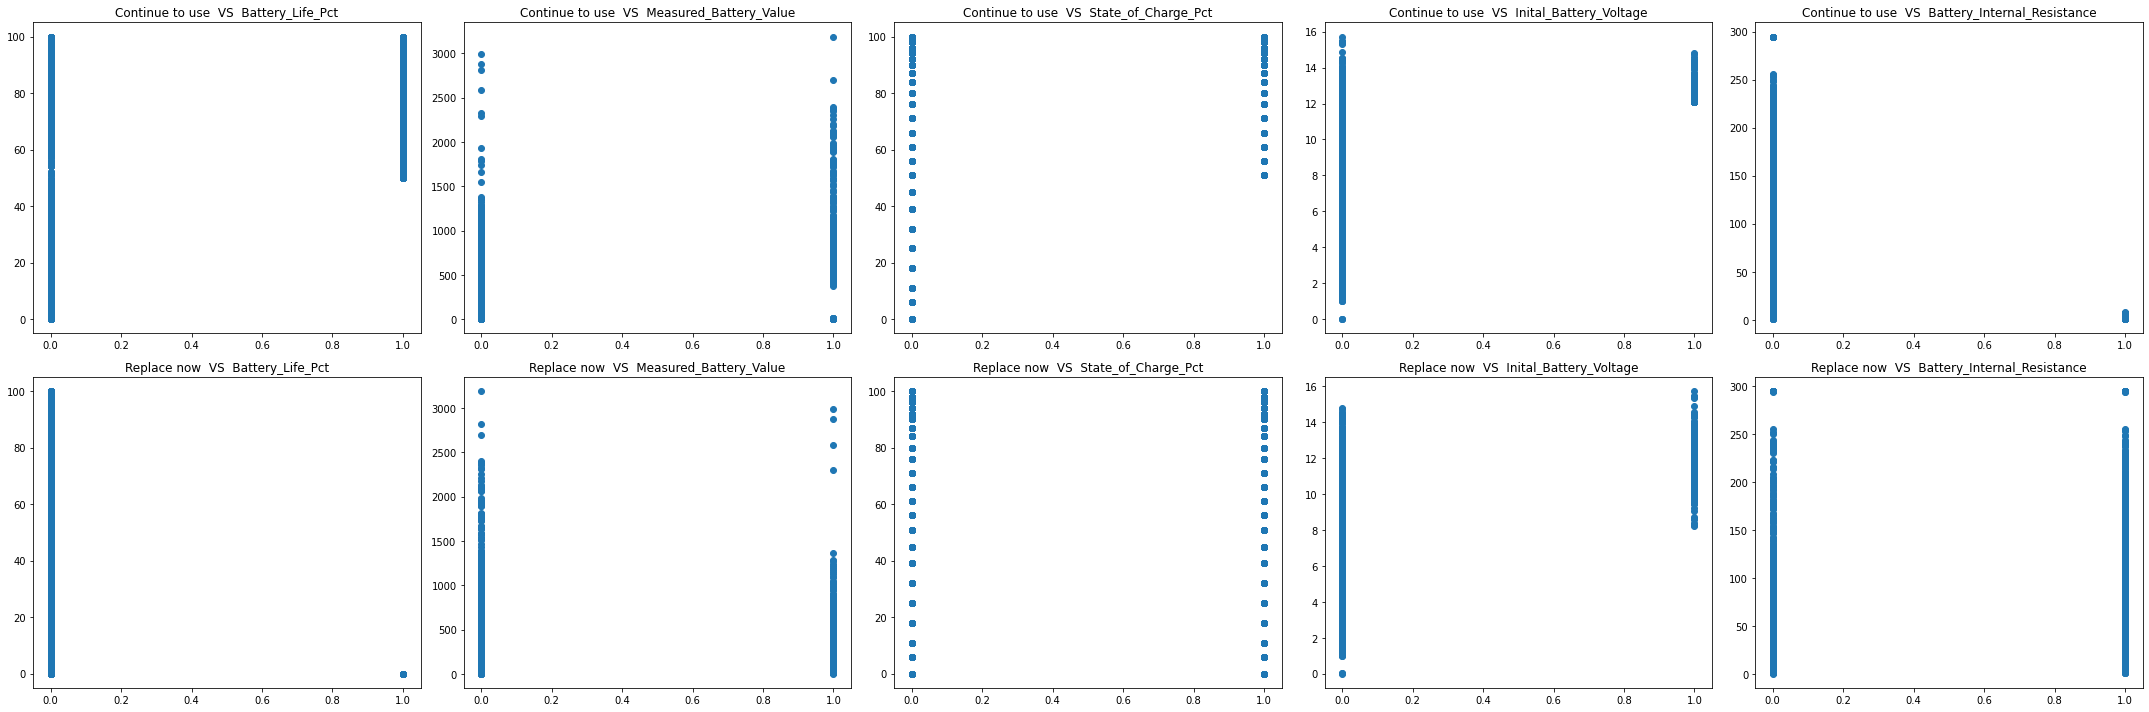

In [ ]:
from IPython.core.pylabtools import figsize
fig, axes = plt.subplots(2,5, figsize=(30,10))
axes[0,0].scatter(df1['Continue to use'],df1['Battery_Life_Pct'])
axes[0,0].set_title('Continue to use  VS  Battery_Life_Pct')

axes[0,1].scatter(df1['Continue to use'],df1['Measured_Battery_Value'])
axes[0,1].set_title('Continue to use  VS  Measured_Battery_Value')

axes[0,2].scatter(df1['Continue to use'],df1['State_of_Charge_Pct'])
axes[0,2].set_title('Continue to use  VS  State_of_Charge_Pct')

axes[0,3].scatter(df1['Continue to use'], df1['Inital_Battery_Voltage'])
axes[0,3].set_title('Continue to use  VS  Inital_Battery_Voltage')

axes[0,4].scatter(df1['Continue to use'], df1['Battery_Internal_Resistance'])
axes[0,4].set_title('Continue to use  VS  Battery_Internal_Resistance')
#--------------------------------------------------------------------------------------------------
axes[1,0].scatter(df1['Replace now'],df1['Battery_Life_Pct'])
axes[1,0].set_title('Replace now  VS  Battery_Life_Pct')

axes[1,1].scatter(df1['Replace now'],df1['Measured_Battery_Value'])
axes[1,1].set_title('Replace now  VS  Measured_Battery_Value')

axes[1,2].scatter(df1['Replace now'],df1['State_of_Charge_Pct'])
axes[1,2].set_title('Replace now  VS  State_of_Charge_Pct')

axes[1,3].scatter(df1['Replace now'], df1['Inital_Battery_Voltage'])
axes[1,3].set_title('Replace now  VS  Inital_Battery_Voltage')

axes[1,4].scatter(df1['Replace now'], df1['Battery_Internal_Resistance'])
axes[1,4].set_title('Replace now  VS  Battery_Internal_Resistance')


fig.tight_layout()
plt.show()

In [ ]:
df1[['Battery_Life_Pct']].sample(5)

,Battery_Life_Pct
63158,87
41031,100
25712,0
27631,0
119385,100


# **Creacion del modelo de bosque aleatorio**

In [ ]:
#seleccionamos los datos para el modelo 
df_modelo = df1[['Inital_Battery_Voltage',
             'State_of_Charge_Pct',
             'Battery_Life_Pct',
             'Measured_Battery_Value',
             'Battery_Internal_Resistance',
             'Battery_Crank_Reference_Value',
             'Battery_Temperature',
             'Recommendation',
             ]]

In [ ]:
from sklearn.model_selection import train_test_split

# X seran nuestras variables independientes
X = df_modelo.drop(['Recommendation'],axis=1)

#y sera nuesta variable a predecir
y = df_modelo['Recommendation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
len(X_train)

123836

In [ ]:
len(X_test)

30959

entrenamiento del modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier

bosque_model = RandomForestClassifier(n_estimators=10)

bosque_model.fit(X_train.values, y_train.values)

bosque_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9893730417649149

In [ ]:
pred = bosque_model.predict(X_test)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array(['Continue to use', 'Continue to use', 'Continue to use', ...,
       'Continue to use', 'Continue to use', 'Continue to use'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9893730417649149

In [ ]:
import joblib as jb
jb.dump(bosque_model,'RF_entrenado.pkl')

['RF_entrenado.pkl']

# **predicciones**

In [ ]:
df_modelo['Recommendation'].value_counts()

Continue to use                                             132727
Replace soon                                                  9233
Replace now                                                   5971
Charge and retest                                             3552
Charge and continue to use                                    2083
Check Battery Size, Replace now                                611
Check Starter Motor, Check Battery Size, Continue to use       576
Check Starter Motor, Check Battery Size, Replace soon           20
Charge and replace soon                                         13
Enter Battery Rating                                             9
Name: Recommendation, dtype: int64

In [ ]:
df_modelo.loc[df1['Recommendation'] == 'Charge and continue to use'].sample(2)

,Inital_Battery_Voltage,State_of_Charge_Pct,Battery_Life_Pct,Measured_Battery_Value,Battery_Internal_Resistance,Battery_Crank_Reference_Value,Battery_Temperature,Recommendation
69348,11.96,18,0,592.40377,5.02,550,20,Charge and continue to use
10373,11.85,0,0,583.66693,5.33,640,22,Charge and continue to use


In [ ]:
list(df_modelo.iloc[69348])

[11.96, 18, 0, 592.40377, 5.02, 550, 20, 'Charge and continue to use']

In [ ]:
bosque_model.predict([[11.96, 18, 0, 592.40377, 5.02, 550, 20]])[0]

'Charge and continue to use'

In [ ]:
Inital_Battery_Voltage = input('cual es el valor de Inital_Battery_Voltage : ')
State_of_Charge_Pct = input ('Cual es el valor del State_of_Charge_Pct: ')
Battery_Life_Pct = input('Cual es el valor de Battery_Life_Pct: ')
Measured_Battery_Value = input('Cual es el valor de Measured_Battery_Value: ')
Battery_Internal_Resistance = input('Cual es el valor de Battery_Internal_Resistance: ')
Battery_Crank_Reference_Value = input('Cual es el valor de Battery_Crank_Reference_Value: ')
Battery_Temperature = input('Cual es el valor de Battery_Temperature: ')

values = [Inital_Battery_Voltage, State_of_Charge_Pct, Battery_Life_Pct, Measured_Battery_Value, Battery_Internal_Resistance, Battery_Crank_Reference_Value, Battery_Temperature]
print('#'*20 + '__LA CLASIFICACIOPN SEGUN LOS DATOS SERIA __'+'#'*20)
bosque_model.predict([values])[0]

cual es el valor de Inital_Battery_Voltage : 11.96
Cual es el valor del State_of_Charge_Pct: 18
Cual es el valor de Battery_Life_Pct: 0
Cual es el valor de Measured_Battery_Value: 592.40377
Cual es el valor de Battery_Internal_Resistance: 5.02
Cual es el valor de Battery_Crank_Reference_Value: 550
Cual es el valor de Battery_Temperature: 20
####################__LA CLASIFICACIOPN SEGUN LOS DATOS SERIA __####################


'Charge and continue to use'